In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2002-2018-property-sales-data.csv to 2002-2018-property-sales-data.csv
Saving 2019-property-sales-data.csv to 2019-property-sales-data.csv
Saving armslengthsales_2020_valid.csv to armslengthsales_2020_valid.csv
Saving armslengthsales_2021_valid.csv to armslengthsales_2021_valid.csv
Saving armslengthsales_2022_valid_20230404.csv to armslengthsales_2022_valid_20230404.csv
Saving armslengthsales_2023_valid.csv to armslengthsales_2023_valid.csv
Saving armslengthsales_2024_valid.csv to armslengthsales_2024_valid.csv


In [3]:
dfs = [pd.read_csv(file) for file in uploaded.keys()]
print(len(dfs))

7


In [4]:
# Checking column names consistency
for i, df in enumerate(dfs):
    print(f"Dataset {i + 1} columns: {df.columns.tolist()}")

Dataset 1 columns: ['PropType', 'Taxkey', 'Address', 'CondoProject', 'District', 'Nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Nr_of_rms', 'Fin_sqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 2 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 3 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 4 columns: ['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject', 'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price']
Dataset 5 columns: ['Prope

In [5]:
# Editing columns name in first dataset
dfs[0] = dfs[0].rename(columns={
    'Nr_of_rms': 'Rooms',
    'Fin_sqft': 'FinishedSqft',
    'Nbhd': 'nbhd',
    'Taxkey': 'taxkey'
})

In [6]:
# Add propertyID columm
dfs[0]['PropertyID'] = range(1, len(dfs[0]) + 1)

cols = ['PropertyID'] + [col for col in dfs[0].columns if col != 'PropertyID']
dfs[0] = dfs[0][cols]

In [7]:
# Checking column name for first DataFrame
print(dfs[0].columns)

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price'],
      dtype='object')


In [8]:
# Merging all datasets
df_merged = pd.concat(dfs, ignore_index=True)

In [9]:
# Checking merged datasets
print(df_merged.head())

   PropertyID    PropType        taxkey                  Address CondoProject  \
0         1.0  Commercial  3.230461e+09            2628 N 6TH ST          NaN   
1         2.0  Commercial  3.590192e+09       1363 N PROSPECT AV          NaN   
2         3.0  Commercial  4.161194e+09            617 S 94TH ST          NaN   
3         4.0  Commercial  1.719836e+09  3624 W SILVER SPRING DR          NaN   
4         5.0  Commercial  3.480290e+09         3830 W LISBON AV          NaN   

   District    nbhd                                             Style Extwall  \
0       6.0  6258.0                                 Commercial Exempt     NaN   
1       3.0  6262.0                    Mansions With Commercial Usage     NaN   
2      10.0  6272.0                                  Service Building     NaN   
3       1.0  6218.0  Store Bldg - Multi Story (Store & Apt, Store & O     NaN   
4      15.0  6254.0  Store Bldg - Multi Story (Store & Apt, Store & O     NaN   

   Stories  Year_Built  Ro

In [10]:
# save merged dataset for backup
df_merged.to_csv('merged_property_sales.csv', index=False)

In [11]:
df_merged

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,1.0,Commercial,3.230461e+09,2628 N 6TH ST,NaN,6.0,6258.0,Commercial Exempt,NaN,2.0,1880.0,0.0,1840,1.0,0.0,0.0,0.0,12750,2002-01,15900
1,2.0,Commercial,3.590192e+09,1363 N PROSPECT AV,NaN,3.0,6262.0,Mansions With Commercial Usage,NaN,2.0,1876.0,0.0,6377,1.0,0.0,0.0,0.0,11840,2002-01,850000
2,3.0,Commercial,4.161194e+09,617 S 94TH ST,NaN,10.0,6272.0,Service Building,NaN,1.0,1954.0,0.0,5022,1.0,0.0,0.0,0.0,9700,2002-01,119000
3,4.0,Commercial,1.719836e+09,3624 W SILVER SPRING DR,NaN,1.0,6218.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955.0,0.0,6420,1.0,0.0,0.0,0.0,8792,2002-01,210000
4,5.0,Commercial,3.480290e+09,3830 W LISBON AV,NaN,15.0,6254.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909.0,0.0,5956,1.0,0.0,0.0,0.0,4840,2002-01,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67986,259692.0,Residential,6.890106e+09,6016 S 19TH ST,NaN,13.0,4860.0,Ranch,Brick,1.0,1970.0,7.0,1621.0,1.0,3.0,2.0,1.0,11520,2024-03-05,328000.0
67987,260094.0,Residential,6.900822e+09,2217 W BRIDGE ST,NaN,13.0,4860.0,Ranch,Aluminum/Vinyl,1.0,1971.0,12.0,1544.0,1.0,6.0,1.0,1.0,7440,2024-03-05,336000.0
67988,260191.0,Residential,6.909902e+09,2135 W MANGOLD AV,NaN,13.0,4860.0,Cottage,Aluminum/Vinyl,1.0,1934.0,7.0,1349.0,1.0,4.0,1.0,0.0,19680,2024-02-29,205000.0
67989,260207.0,Residential,6.909918e+09,2240 W MANGOLD AV,NaN,13.0,4860.0,Res O/S A & 1/2,Aluminum/Vinyl,1.5,1928.0,6.0,1402.0,1.0,3.0,1.0,0.0,16320,2024-03-22,267000.0


In [12]:
df = df_merged

In [13]:
df

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,1.0,Commercial,3.230461e+09,2628 N 6TH ST,NaN,6.0,6258.0,Commercial Exempt,NaN,2.0,1880.0,0.0,1840,1.0,0.0,0.0,0.0,12750,2002-01,15900
1,2.0,Commercial,3.590192e+09,1363 N PROSPECT AV,NaN,3.0,6262.0,Mansions With Commercial Usage,NaN,2.0,1876.0,0.0,6377,1.0,0.0,0.0,0.0,11840,2002-01,850000
2,3.0,Commercial,4.161194e+09,617 S 94TH ST,NaN,10.0,6272.0,Service Building,NaN,1.0,1954.0,0.0,5022,1.0,0.0,0.0,0.0,9700,2002-01,119000
3,4.0,Commercial,1.719836e+09,3624 W SILVER SPRING DR,NaN,1.0,6218.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955.0,0.0,6420,1.0,0.0,0.0,0.0,8792,2002-01,210000
4,5.0,Commercial,3.480290e+09,3830 W LISBON AV,NaN,15.0,6254.0,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909.0,0.0,5956,1.0,0.0,0.0,0.0,4840,2002-01,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67986,259692.0,Residential,6.890106e+09,6016 S 19TH ST,NaN,13.0,4860.0,Ranch,Brick,1.0,1970.0,7.0,1621.0,1.0,3.0,2.0,1.0,11520,2024-03-05,328000.0
67987,260094.0,Residential,6.900822e+09,2217 W BRIDGE ST,NaN,13.0,4860.0,Ranch,Aluminum/Vinyl,1.0,1971.0,12.0,1544.0,1.0,6.0,1.0,1.0,7440,2024-03-05,336000.0
67988,260191.0,Residential,6.909902e+09,2135 W MANGOLD AV,NaN,13.0,4860.0,Cottage,Aluminum/Vinyl,1.0,1934.0,7.0,1349.0,1.0,4.0,1.0,0.0,19680,2024-02-29,205000.0
67989,260207.0,Residential,6.909918e+09,2240 W MANGOLD AV,NaN,13.0,4860.0,Res O/S A & 1/2,Aluminum/Vinyl,1.5,1928.0,6.0,1402.0,1.0,3.0,1.0,0.0,16320,2024-03-22,267000.0


**Data Cleaning**

In [14]:
df.describe()

,PropertyID,taxkey,District,nbhd,Stories,Year_Built,Rooms,Units,Bdrms,Fbath,Hbath
count,67989.000000,6.798900e+04,67987.000000,67932.000000,67815.000000,67926.000000,66289.000000,67989.000000,66290.000000,67334.000000,63149.000000
mean,226378.672756,3.620516e+09,7.986556,3612.502856,1.350122,1925.378014,3.573489,1.517422,3.084387,1.362996,0.315650
std,317173.131850,1.493589e+09,4.205265,1832.314399,0.613201,192.016892,3.933328,8.179143,8.031080,0.716259,0.512453
min,1.000000,1.001100e+07,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16998.000000,2.611167e+09,4.000000,2080.000000,1.000000,1923.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,33995.000000,3.531546e+09,8.000000,4120.000000,1.000000,1950.000000,4.000000,1.000000,3.000000,1.000000,0.000000
75%,230089.000000,5.001400e+09,11.000000,4910.000000,2.000000,1959.000000,6.000000,1.000000,4.000000,2.000000,1.000000
max,881476.000000,7.169999e+09,15.000000,42703.000000,28.000000,2024.000000,63.000000,781.000000,2031.000000,10.000000,10.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67991 entries, 0 to 67990
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    67989 non-null  float64
 1   PropType      67978 non-null  object 
 2   taxkey        67989 non-null  float64
 3   Address       67985 non-null  object 
 4   CondoProject  11033 non-null  object 
 5   District      67987 non-null  float64
 6   nbhd          67932 non-null  float64
 7   Style         67890 non-null  object 
 8   Extwall       53521 non-null  object 
 9   Stories       67815 non-null  float64
 10  Year_Built    67926 non-null  float64
 11  Rooms         66289 non-null  float64
 12  FinishedSqft  67882 non-null  object 
 13  Units         67989 non-null  float64
 14  Bdrms         66290 non-null  float64
 15  Fbath         67334 non-null  float64
 16  Hbath         63149 non-null  float64
 17  Lotsize       67988 non-null  object 
 18  Sale_date     67989 non-nu

In [16]:
df.isnull().sum()

,0
PropertyID,2
PropType,13
taxkey,2
Address,6
CondoProject,56958
District,4
nbhd,59
Style,101
Extwall,14470
Stories,176


In [17]:
# calculating % of missing values
missing_values_percentage = df.isnull().mean() * 100
print(missing_values_percentage)

PropertyID       0.002942
PropType         0.019120
taxkey           0.002942
Address          0.008825
CondoProject    83.772852
District         0.005883
nbhd             0.086776
Style            0.148549
Extwall         21.282229
Stories          0.258858
Year_Built       0.095601
Rooms            2.503272
FinishedSqft     0.160315
Units            0.002942
Bdrms            2.501802
Fbath            0.966304
Hbath            7.121531
Lotsize          0.004412
Sale_date        0.002942
Sale_price       0.017649
dtype: float64


In [18]:
# drop condo project column due to too many missing values
df = df.drop(columns=["CondoProject"])
print(df.columns)

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Style', 'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft',
       'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date',
       'Sale_price'],
      dtype='object')


In [19]:
# dropping "Style" column
df = df.drop(columns=["Style"])

In [20]:
# function to fill out "Extwall" based on similar "PropType"
def fill_extwall(group):
  mode_value = group.mode()[0] if not group.mode().empty else "N/A"
  return group.fillna(mode_value)

In [21]:
# apply
df["Extwall"] = df.groupby("PropType")["Extwall"].transform(fill_extwall)

remaining_missing_values = df["Extwall"].isnull().sum()
print(remaining_missing_values)

13


In [22]:
df["Extwall"].fillna("N/A", inplace=True)

<ipython-input-22-99000a9b74c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Extwall"].fillna("N/A", inplace=True)


In [171]:
# fill missing values using mode
prop_type_mode = df["PropType"].mode()[0]
df["PropType"].fillna(prop_type_mode, inplace=True)

district_mode = df["District"].mode()[0]
df["District"].fillna(district_mode, inplace=True)

nbhd_mode = df["nbhd"].mode()[0]
df["nbhd"].fillna(nbhd_mode, inplace=True)

<ipython-input-171-dca8c03dc1df>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PropType"].fillna(prop_type_mode, inplace=True)
<ipython-input-171-dca8c03dc1df>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [24]:
# fill missing "Address" records with N/A
df["Address"].fillna("N/A", inplace=True)

<ipython-input-24-9a54bb93bb93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Address"].fillna("N/A", inplace=True)


In [25]:
# fill missing columns value with median
rooms_median = df["Rooms"].median()
df["Rooms"].fillna(rooms_median, inplace=True)

bdrms_median = df["Bdrms"].median()
df["Bdrms"].fillna(bdrms_median, inplace=True)

fbath_median = df["Fbath"].median()
df["Fbath"].fillna(fbath_median, inplace=True)

hbath_median = df["Hbath"].median()
df["Hbath"].fillna(hbath_median, inplace=True)

stories_median = df["Stories"].median()
df["Stories"].fillna(stories_median, inplace=True)

year_built_median = df["Year_Built"].median()
df["Year_Built"].fillna(year_built_median, inplace=True)

units_median = df["Units"].median()
df["Units"].fillna(units_median, inplace=True)

<ipython-input-25-320801bf7943>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rooms"].fillna(rooms_median, inplace=True)
<ipython-input-25-320801bf7943>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
# fill missing values for following columns with N/A
df["PropertyID"].fillna("N/A", inplace=True)
df["taxkey"].fillna("N/A", inplace=True)
df["Sale_date"].fillna("N/A", inplace=True)

<ipython-input-26-c816f65bfde2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PropertyID"].fillna("N/A", inplace=True)
<ipython-input-26-c816f65bfde2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["PropertyID"].fillna("N/A", inplace=True)
<ipython-input-26-c816f65bfde2>:3: FutureWarning: A value is trying to be set on a copy of a DataFram

In [27]:
# changing "Lotsize" column data type to float
df["Lotsize"] = df["Lotsize"].replace(",", "", regex=True).astype(float)

# fill missing column value with median
lotsize_median = df["Lotsize"].median()
df["Lotsize"].fillna(lotsize_median, inplace=True)

<ipython-input-27-89accb3e486c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Lotsize"].fillna(lotsize_median, inplace=True)


In [28]:
# changing "FinishedSqft" column data type to float
df["FinishedSqft"] = df["FinishedSqft"].replace(",", "", regex=True).astype(float)

# fill missing "FinishedSqft" value with median
finishedsqft_median = df["FinishedSqft"].median()
df["FinishedSqft"].fillna(finishedsqft_median, inplace=True)

<ipython-input-28-40eb1604e4d6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FinishedSqft"].fillna(finishedsqft_median, inplace=True)


In [29]:
# convert sale_price column into numeric
df["Sale_price"] = df["Sale_price"].str.replace('[\$,]', '', regex=True).astype(float)

In [30]:
# drop missing records for "Sale_price" since this is the target variable
df = df.dropna(subset=["Sale_price"])
# remove "Sale_price" with value of 0 which are transfer of ownerships
df = df[df["Sale_price"] > 0]

In [31]:
df.duplicated().sum()

0

In [32]:
df = df.drop_duplicates()

In [33]:
#Fucntion for removing outliers using IQR
def remove_outliers_by_property_type(df, column='Sale_price', group_col='PropType', iqr_multiplier=1.5):

    def filter_group(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

    return df.groupby(group_col, group_keys=False).apply(filter_group)

df_cleaned = remove_outliers_by_property_type(df, column='Sale_price', group_col='PropType')

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after property-type-specific outlier removal: {len(df_cleaned)}")

Original dataset size: 12862
Dataset size after property-type-specific outlier removal: 12323


<ipython-input-33-8a80b4b12c96>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(filter_group)


In [34]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units',
       'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price'],
      dtype='object')

In [35]:
file_name = "cleaned_property_sales.csv"
df.to_csv(file_name, index=False)

**Exploratory Data Analysis**

In [36]:
df.describe()

,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
count,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,12862.000000,1.286200e+04,1.286200e+04
mean,7.909890,3335.211864,1.358692,1936.734334,6.307573,2064.481418,1.788291,3.234023,1.444565,0.303297,1.740540e+05,2.248087e+05
std,4.277416,1754.294083,0.542382,110.750878,2.492150,7329.929089,12.830471,1.182302,0.695771,0.516416,1.554856e+07,8.030571e+05
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.500000e+03
25%,4.000000,1840.000000,1.000000,1922.000000,5.000000,1072.000000,1.000000,3.000000,1.000000,0.000000,3.660000e+03,1.193275e+05
50%,8.000000,3150.000000,1.000000,1949.000000,6.000000,1358.000000,1.000000,3.000000,1.000000,0.000000,5.040000e+03,1.700000e+05
75%,11.000000,4620.000000,2.000000,1959.000000,8.000000,1932.000000,2.000000,4.000000,2.000000,1.000000,6.750000e+03,2.300000e+05
max,15.000000,6982.000000,19.000000,2020.000000,21.000000,360000.000000,781.000000,9.000000,6.000000,10.000000,1.703065e+09,7.042500e+07


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12862 entries, 40734 to 53596
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    12862 non-null  object 
 1   PropType      12862 non-null  object 
 2   taxkey        12862 non-null  object 
 3   Address       12862 non-null  object 
 4   District      12862 non-null  float64
 5   nbhd          12862 non-null  float64
 6   Extwall       12862 non-null  object 
 7   Stories       12862 non-null  float64
 8   Year_Built    12862 non-null  float64
 9   Rooms         12862 non-null  float64
 10  FinishedSqft  12862 non-null  float64
 11  Units         12862 non-null  float64
 12  Bdrms         12862 non-null  float64
 13  Fbath         12862 non-null  float64
 14  Hbath         12862 non-null  float64
 15  Lotsize       12862 non-null  float64
 16  Sale_date     12862 non-null  object 
 17  Sale_price    12862 non-null  float64
dtypes: float64(12), object(6)
m

In [38]:
df.shape

(12862, 18)

In [148]:
# Summary statistics for Sale_price
sale_price_stats = df['Sale_price'].describe()
pd.set_option('display.float_format', '{:,.2f}'.format)
sale_price_stats = df['Sale_price'].describe()
print(sale_price_stats)

count       12,823.00
mean       225,271.07
std        804,163.87
min          2,800.00
25%        120,000.00
50%        170,000.00
75%        230,000.00
max     70,425,000.00
Name: Sale_price, dtype: float64


<ipython-input-173-cdecc5c9d610>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="PropType", y="Sale_price", palette="Set2")


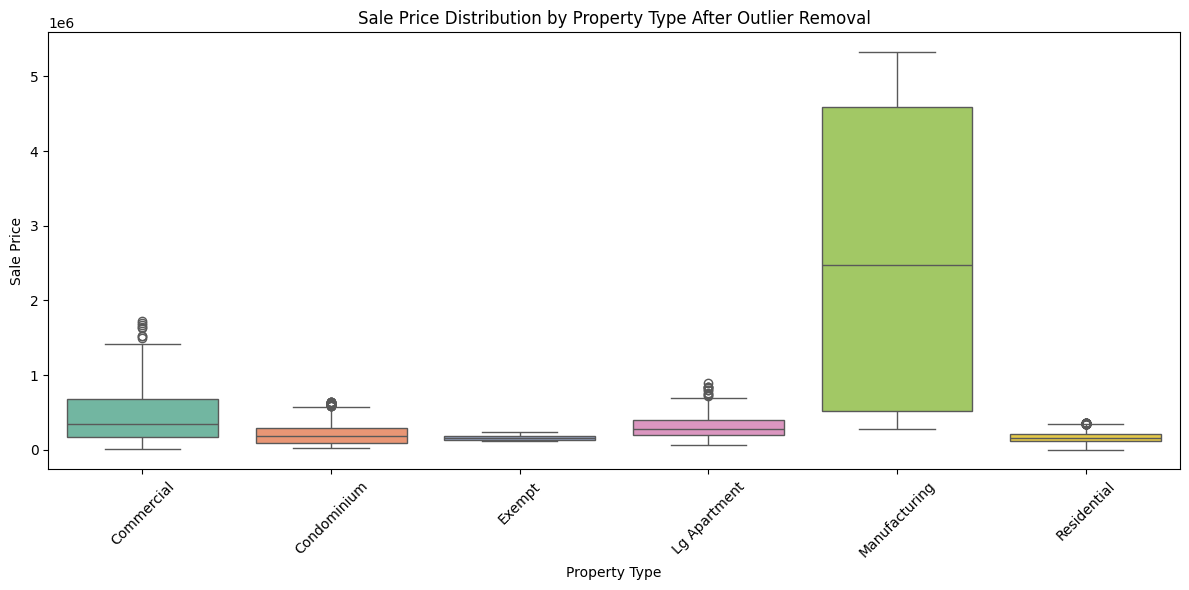

In [173]:
# Boxplot by property type after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="PropType", y="Sale_price", palette="Set2")
plt.title("Sale Price Distribution by Property Type After Outlier Removal")
plt.xlabel("Property Type")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PropType
Residential      10506
Condominium       1705
Lg Apartment       357
Commercial         286
Manufacturing        4
Exempt               4
Name: count, dtype: int64


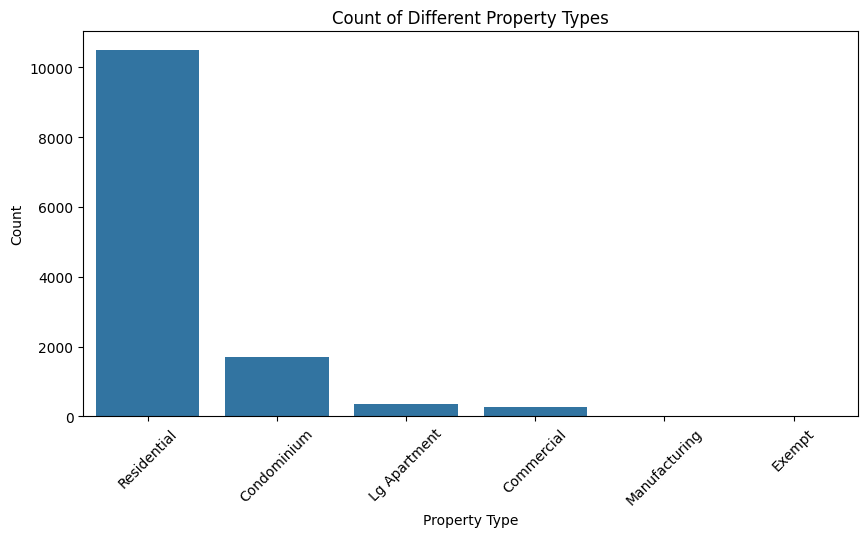

In [40]:
# proptype categories count
prop_type_counts = df["PropType"].value_counts()
print(prop_type_counts)

# visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=prop_type_counts.index, y=prop_type_counts.values)
plt.title("Count of Different Property Types")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle=" ", alpha=0.7)
plt.show()

In [41]:
# splitting property type into focusing on residential and commercial for visualization
df["Residential"] = (df["PropType"] == "Residential").astype(int)
df["Commercial"] = (df["PropType"] == "Commercial").astype(int)
df["Condominium"] = (df["PropType"] == "Condominium").astype(int)

In [42]:
# Create column "Property_Age"
max_year = df["Year_Built"].max()
df["Property_Age"] = max_year - df["Year_Built"]

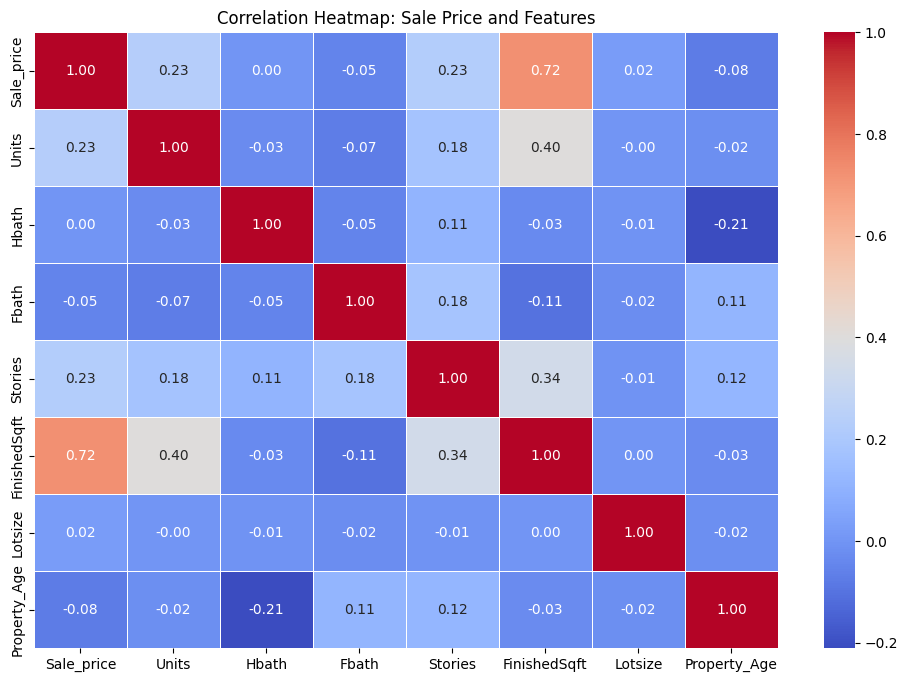

In [174]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[["Sale_price", "Units", "Hbath", "Fbath", "Stories", "FinishedSqft", "Lotsize", "Property_Age"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Sale Price and Features")
plt.show()

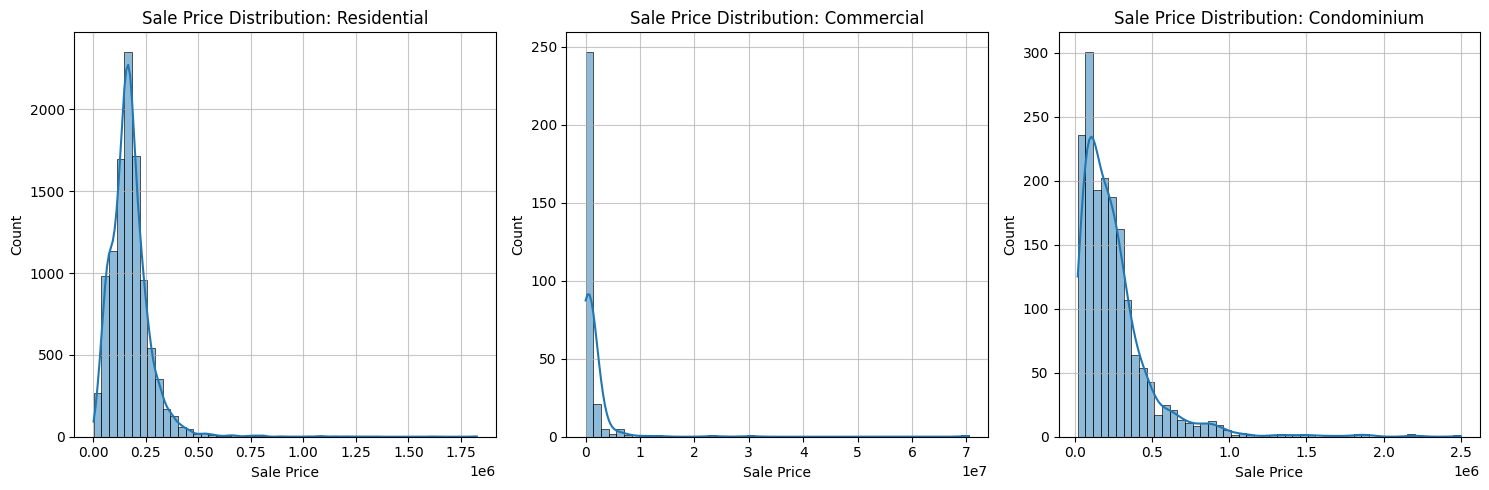

In [44]:
# visualizing the distribution of sale price for commercial and residential properties
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# residential distribution
sns.histplot(df[df["Residential"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Sale Price Distribution: Residential")
axes[0].set_xlabel("Sale Price")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle="-", alpha=0.7)

# commercial distribution
sns.histplot(df[df["Commercial"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Sale Price Distribution: Commercial")
axes[1].set_xlabel("Sale Price")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle="-", alpha=0.7)

# condominium distribution
sns.histplot(df[df["Condominium"] == 1]["Sale_price"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Sale Price Distribution: Condominium")
axes[2].set_xlabel("Sale Price")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle="-", alpha=0.7)

plt.tight_layout()
plt.show()

In [45]:
df_uncapped = df[df["Sale_price"] <= 1_000_000]

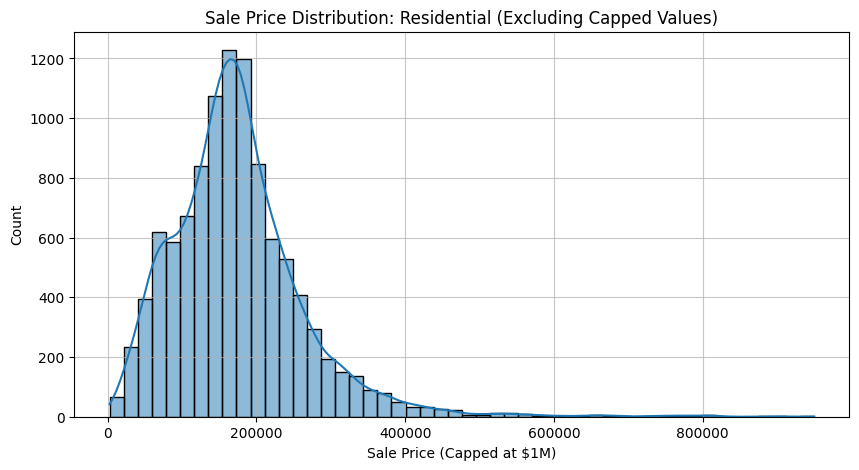

In [46]:
# cap sale prices at $1M
df["Capped_Sale_Price"] = np.where(df["Sale_price"] > 1_000_000, 1_000_000, df["Sale_price"])
df_uncapped = df[df["Sale_price"] <= 1_000_000]

# Plot for residential
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Residential"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Residential (Excluding Capped Values)")
plt.xlabel("Sale Price (Capped at $1M)")
plt.ylabel("Count")
plt.grid(True, linestyle="-", alpha=0.7)
plt.show()

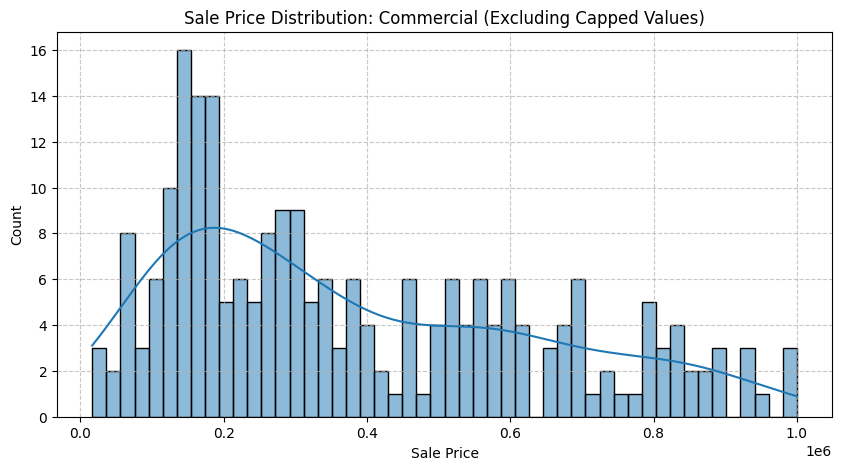

In [47]:
# plot for commercial
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Commercial"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Commercial (Excluding Capped Values)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

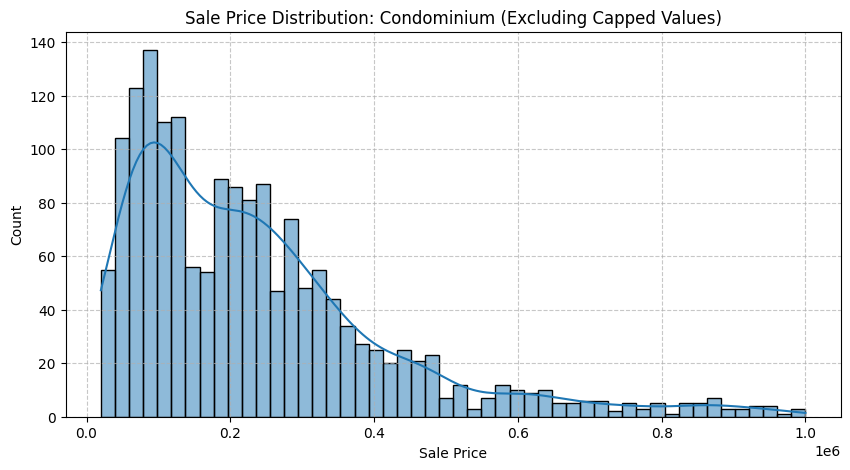

In [48]:
# plot for condo
plt.figure(figsize=(10, 5))
sns.histplot(df_uncapped[df_uncapped["Condominium"] == 1]["Sale_price"], bins=50, kde=True)
plt.title("Sale Price Distribution: Condominium (Excluding Capped Values)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

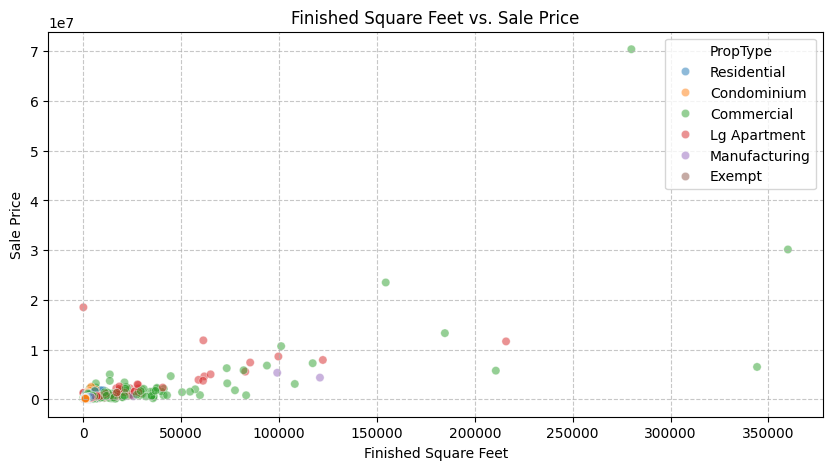

In [49]:
# scatterplot finishedsqft vs sale price
df_filtered = df[df["Sale_price"] <= 1_200_000]
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="FinishedSqft", y="Sale_price", hue="PropType", alpha=0.5)
plt.title("Finished Square Feet vs. Sale Price")
plt.xlabel("Finished Square Feet")
plt.ylabel("Sale Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

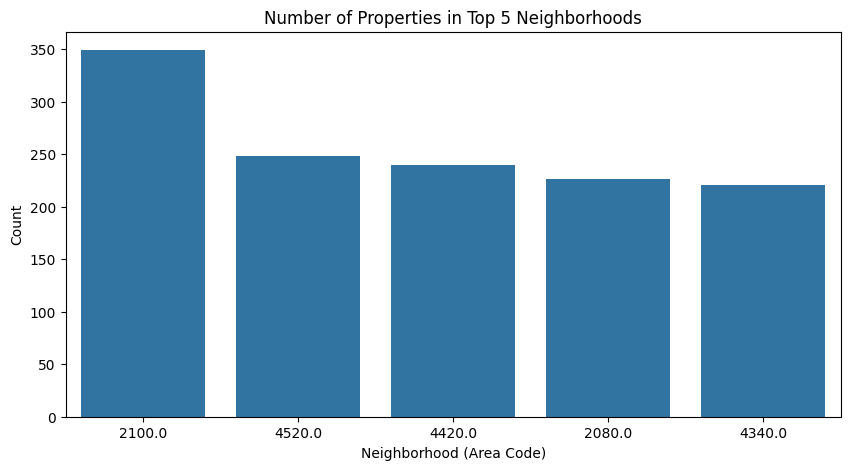

In [50]:
#top 5 neighborhood with most properties
top_5_nbhd = df["nbhd"].value_counts().head(5).index
df_top_5_nbhd = df[df["nbhd"].isin(top_5_nbhd)]

# countplot top 5 neighborhood (area code)
plt.figure(figsize=(10, 5))
sns.countplot(x="nbhd", data=df_top_5_nbhd, order=top_5_nbhd)
plt.title("Number of Properties in Top 5 Neighborhoods")
plt.xlabel("Neighborhood (Area Code)")
plt.ylabel("Count")
plt.grid(True, linestyle="", alpha=0.7)
plt.show()

<ipython-input-51-1541290375cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property_Age"] = 2024 - df["Year_Built"]


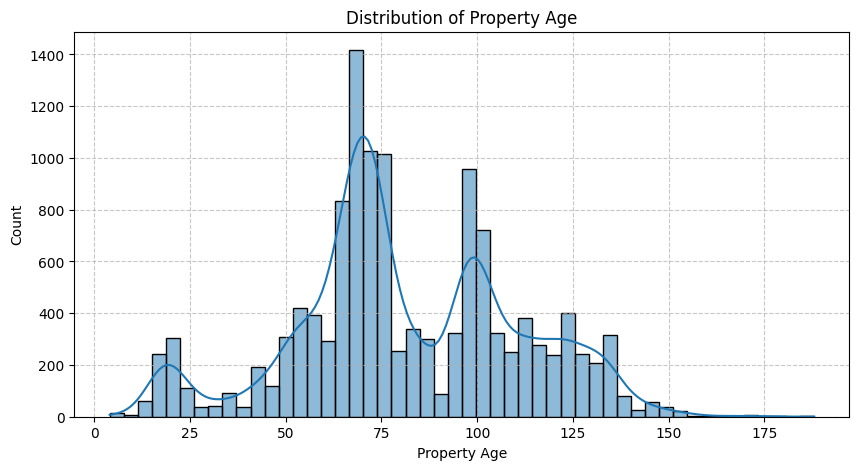

In [51]:
# creating new column "Property_Age"
df = df[df["Year_Built"] != 0]
df["Property_Age"] = 2024 - df["Year_Built"]

plt.figure(figsize=(10, 5))
sns.histplot(df["Property_Age"], bins=50, kde=True)
plt.title("Distribution of Property Age")
plt.xlabel("Property Age")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

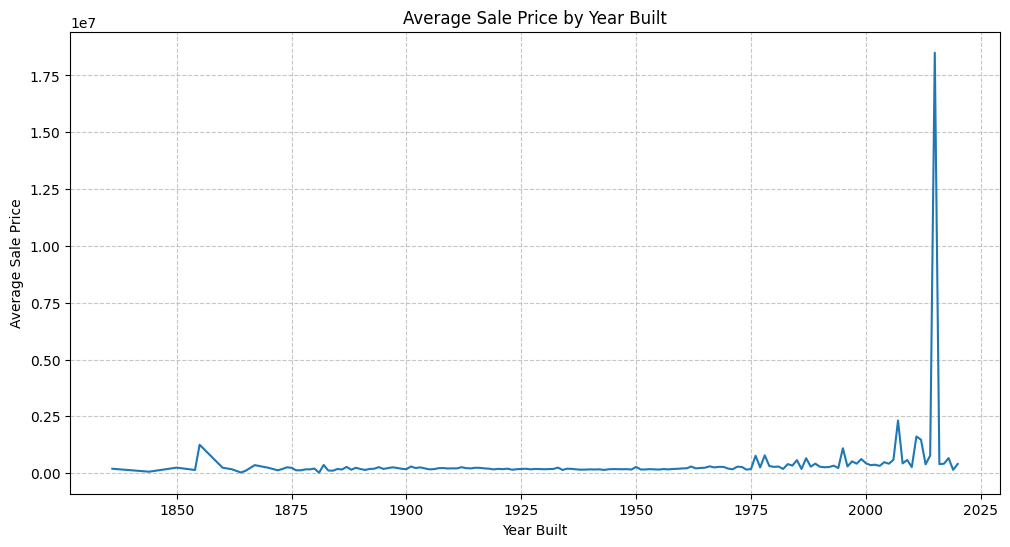

In [52]:
# plotting average sale price of properties by year built
df = df[df["Year_Built"] > 0]
avg_price_by_year = df.groupby("Year_Built")["Sale_price"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title("Average Sale Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

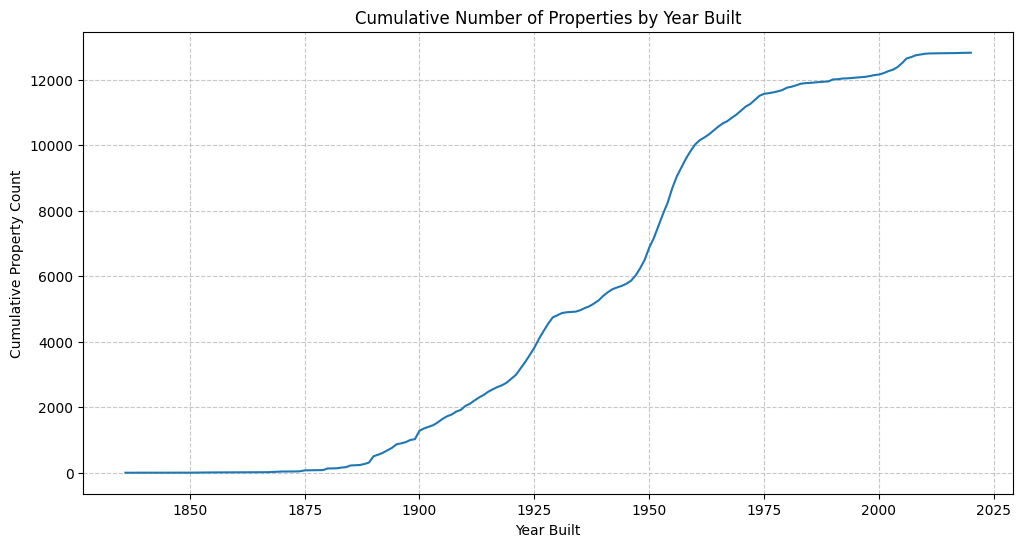

In [53]:
# plot properties count by year_built
cumulative_properties = df.groupby("Year_Built").size().cumsum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_properties.index, y=cumulative_properties.values)
plt.title("Cumulative Number of Properties by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Cumulative Property Count")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [54]:
# range and distribution of year sold
df["Sale_date"] = pd.to_datetime(df["Sale_date"], errors="coerce")

df["Year_Sold"] = df["Sale_date"].dt.year
print(df["Year_Sold"].value_counts().sort_index())

Year_Sold
2020    6338
2021    6485
Name: count, dtype: int64


In [55]:
# properties that are sold more than once (to calculate appreciation)
multiple_sales = df["taxkey"].value_counts()
print(multiple_sales[multiple_sales > 1].head())

taxkey
5360559000.0    16
4331826000.0     4
1920358000.0     3
3490351100.0     3
340313000.0      3
Name: count, dtype: int64


In [56]:
# Ensure the data is correctly sorted
df = df.sort_values(by=["taxkey", "Sale_date"])

In [57]:
# Recalculate appreciation after sorting properly
df["Appreciation"] = df.groupby("taxkey")["Sale_price"].pct_change()
df_appreciation = df.dropna(subset=["Appreciation"])
print(df_appreciation["Year_Sold"].value_counts().sort_index())

Year_Sold
2020     60
2021    275
Name: count, dtype: int64


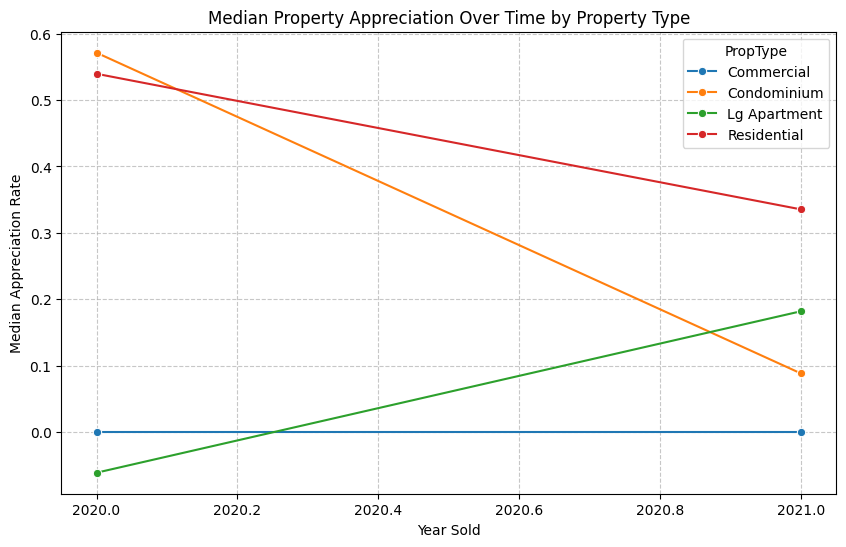

In [58]:
# calculate median appreciation and line plot
median_appreciation = df_appreciation.groupby(["Year_Sold", "PropType"])["Appreciation"].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=median_appreciation, x="Year_Sold", y="Appreciation", hue="PropType", marker="o")
plt.title("Median Property Appreciation Over Time by Property Type")
plt.xlabel("Year Sold")
plt.ylabel("Median Appreciation Rate")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

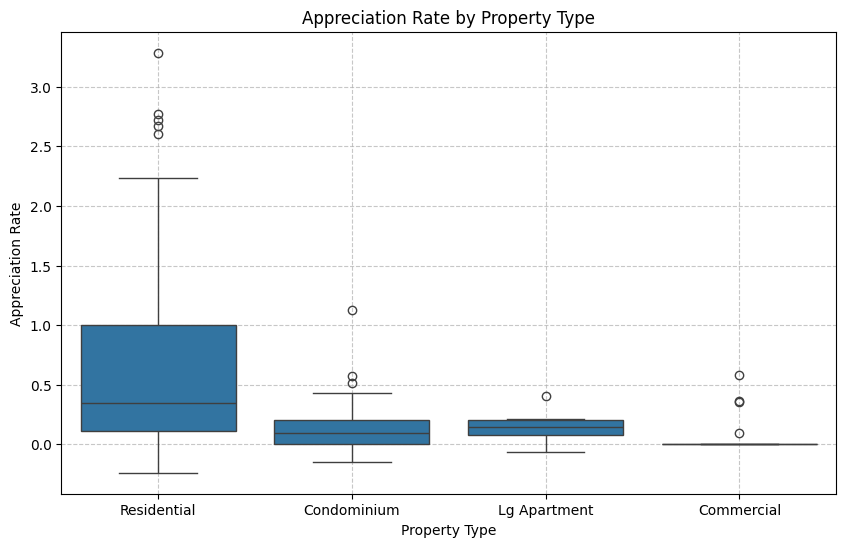

In [59]:
# boxplot of appreciation distribution by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x="PropType", y="Appreciation", data=df_appreciation)
plt.title("Appreciation Rate by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Appreciation Rate")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Training the Dataset for sale price prediction**

In [114]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

In [84]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'District', 'nbhd',
       'Extwall', 'Stories', 'Year_Built', 'Rooms', 'FinishedSqft', 'Units',
       'Bdrms', 'Fbath', 'Hbath', 'Lotsize', 'Sale_date', 'Sale_price',
       'Residential', 'Commercial', 'Condominium', 'Property_Age',
       'Capped_Sale_Price', 'Year_Sold', 'Appreciation', 'Rooms_Per_Unit',
       'Total_Bathrooms'],
      dtype='object')

In [86]:
# Check unique values in PropType
print("Unique values in PropType:", df["PropType"].unique())

# Check for missing values
print("Number of missing values in PropType:", df["PropType"].isna().sum())

Unique values in PropType: ['Commercial' 'Residential' 'Condominium' 'Lg Apartment' 'Manufacturing'
 'Exempt']
Number of missing values in PropType: 0


In [87]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit and transform the PropType column
encoded_props = pd.DataFrame(
    encoder.fit_transform(df[["PropType"]]),
    columns=encoder.get_feature_names_out(['PropType'])
)

# Drop the original PropType column and concatenate the encoded columns
df_encoded = pd.concat([df.drop(['PropType'], axis=1), encoded_props], axis=1)
df_encoded.head()

,PropertyID,taxkey,Address,District,nbhd,Extwall,Stories,Year_Built,Rooms,FinishedSqft,...,Year_Sold,Appreciation,Rooms_Per_Unit,Total_Bathrooms,PropType_Commercial,PropType_Condominium,PropType_Exempt,PropType_Lg Apartment,PropType_Manufacturing,PropType_Residential
47089,868088.0,30171000.0,9400-9408 N 107TH ST,9.0,6202.0,Concrete Block,1.0,1973.0,4.0,12960.0,...,2021.0,NaN,0.666667,0.0,NaN,NaN,NaN,NaN,NaN,NaN
47090,875720.0,40012000.0,9231 W COUNTY LINE RD,9.0,40.0,Aluminum/Vinyl,1.0,1952.0,4.0,840.0,...,2021.0,NaN,4.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40734,848609.0,40062000.0,9421 N MICHAEL CT,9.0,40.0,Fiber Cement/Hardiplank,2.0,2006.0,11.0,2615.0,...,2020.0,NaN,11.000000,3.5,NaN,NaN,NaN,NaN,NaN,NaN
40735,859441.0,40062000.0,9421 N MICHAEL CT,9.0,40.0,Fiber Cement/Hardiplank,2.0,2006.0,11.0,2615.0,...,2020.0,0.036134,11.000000,3.5,NaN,NaN,NaN,NaN,NaN,NaN
40736,848069.0,40064000.0,9445 N MICHAEL CT,9.0,40.0,Fiber Cement/Hardiplank,2.0,2006.0,10.0,3140.0,...,2020.0,NaN,10.000000,3.5,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Check the output of the encoder
encoded_array = encoder.fit_transform(df[["PropType"]])
encoded_props = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(["PropType"])
)

# Inspect the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_props.head())

Encoded DataFrame:
   PropType_Commercial  PropType_Condominium  PropType_Exempt  \
0                  1.0                   0.0              0.0   
1                  0.0                   0.0              0.0   
2                  0.0                   0.0              0.0   
3                  0.0                   0.0              0.0   
4                  0.0                   0.0              0.0   

   PropType_Lg Apartment  PropType_Manufacturing  PropType_Residential  
0                    0.0                     0.0                   0.0  
1                    0.0                     0.0                   1.0  
2                    0.0                     0.0                   1.0  
3                    0.0                     0.0                   1.0  
4                    0.0                     0.0                   1.0  


In [89]:
# Combining Features
df["Rooms_Per_Unit"] = df["Rooms"] / (df["Units"].replace(0, 1))
df["Total_Bathrooms"] = df["Fbath"] + 0.5 * df["Hbath"]
df[["Rooms_Per_Unit", "Total_Bathrooms"]].head()

,Rooms_Per_Unit,Total_Bathrooms
47089,0.666667,0.0
47090,4.000000,1.0
40734,11.000000,3.5
40735,11.000000,3.5
40736,10.000000,3.5


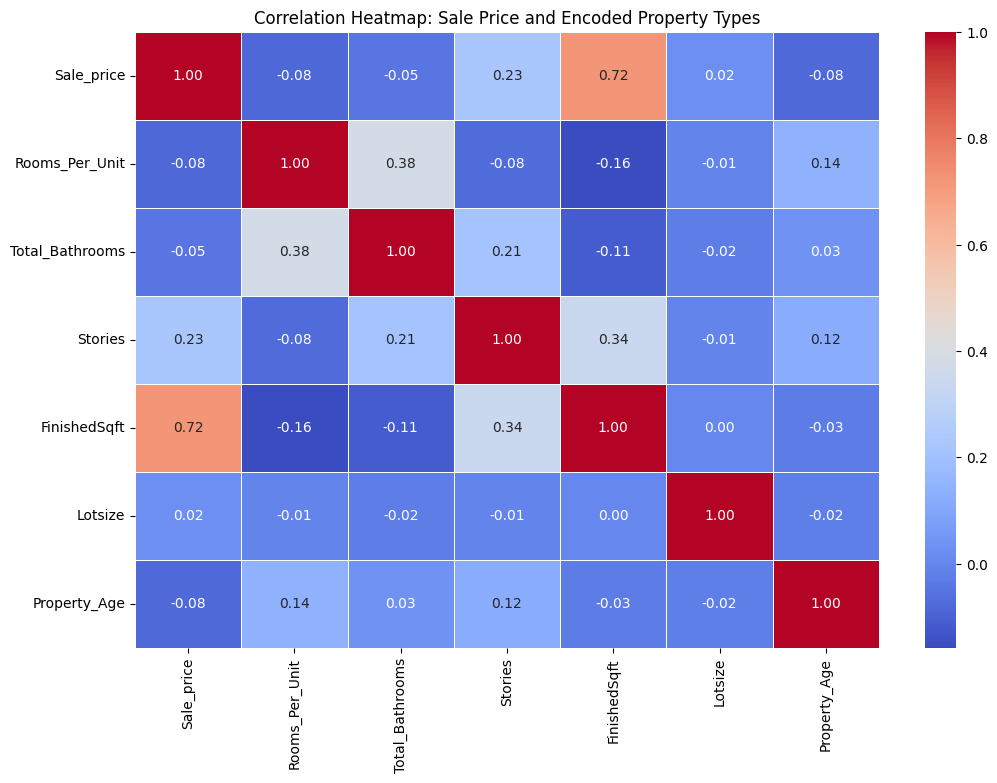

In [90]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[["Sale_price", "Rooms_Per_Unit", "Total_Bathrooms", "Stories", "FinishedSqft", "Lotsize", "Property_Age"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Sale Price and Encoded Property Types")
plt.show()

In [104]:
# Features and target variable
features = ["Stories", "Property_Age", "Rooms_Per_Unit", "FinishedSqft",
            "Units", "Total_Bathrooms", "Lotsize"] + \
           [col for col in df_encoded.columns if col.startswith("PropType_")]

X = df_encoded[features]
y = df_encoded["Sale_price"]

# Log-transform to deal with high variance
y = np.log1p(y)

In [105]:
# Handle missing values in features using median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop rows with missing values
X_imputed.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_imputed = X_imputed[~y.isna()]
y_cleaned = y[~y.isna()]

print("Features shape:", X_imputed.shape)
print("Target shape:", y_cleaned.shape)

Features shape: (12823, 7)
Target shape: (12823,)


In [106]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_cleaned, test_size=0.2, random_state=42)

# Split sizes
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (10258, 7) (10258,)
Testing set size: (2565, 7) (2565,)


In [107]:
# Initialize scaler
scaler = StandardScaler()

# Scale training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes of scaled data
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (10258, 7)
Scaled testing data shape: (2565, 7)


In [108]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Reverse log-transform predictions and actual values
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)

# Evaluate
lr_r2 = r2_score(y_test_orig, y_pred_orig)
lr_rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
lr_mae = mean_absolute_error(y_test_orig, y_pred_orig)
print("Linear Regression Performance:")
print(f"R²: {lr_r2:.4f}")
print(f"RMSE: ${lr_rmse:,.2f}")
print(f"MAE: ${lr_mae:,.2f}")

Linear Regression Performance:
R²: 0.5636
RMSE: $361,672.59
MAE: $90,985.80


In [168]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Transform predictions and actual values back from log scale
y_test_orig = np.expm1(y_test)
y_pred_rf_orig = np.expm1(y_pred_rf)

# Evaluate performance
rf_r2 = r2_score(y_test_orig, y_pred_rf_orig)
rf_rmse = mean_squared_error(y_test_orig, y_pred_rf_orig, squared=False)
rf_mae = mean_absolute_error(y_test_orig, y_pred_rf_orig)
print("Random Forest Performance:")
print(f"R²: {rf_r2:.4f}")
print(f"RMSE: ${rf_rmse:,.2f}")
print(f"MAE: ${rf_mae:,.2f}")

Random Forest Performance:
R²: 0.5988
RMSE: $346,802.42
MAE: $68,142.05


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [169]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=3)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Transform predictions and actual values back from log scale
y_pred_gb_orig = np.expm1(y_pred_gb)
y_test_orig = np.expm1(y_test)

# Evaluate performance
gb_r2 = r2_score(y_test_orig, y_pred_gb_orig)
gb_rmse = mean_squared_error(y_test_orig, y_pred_gb_orig, squared=False)
gb_mae = mean_absolute_error(y_test_orig, y_pred_gb_orig)
print("Gradient Boosting Performance:")
print(f"R²: {gb_r2:.4f}")
print(f"RMSE: ${gb_rmse:,.2f}")
print(f"MAE: ${gb_mae:,.2f}")

Gradient Boosting Performance:
R²: 0.6362
RMSE: $330,207.76
MAE: $72,065.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [170]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Transform predictions and actual values back from log scale
y_pred_xgb_orig = np.expm1(y_pred_xgb)

# Evaluate performance
xgb_r2 = r2_score(y_test_orig, y_pred_xgb_orig)
xgb_rmse = mean_squared_error(y_test_orig, y_pred_xgb_orig, squared=False)
xgb_mae = mean_absolute_error(y_test_orig, y_pred_xgb_orig)
print("XGBoost Performance:")
print(f"R²: {xgb_r2:.4f}")
print(f"RMSE: ${xgb_rmse:,.2f}")
print(f"MAE: ${xgb_mae:,.2f}")

XGBoost Performance:
R²: 0.3039
RMSE: $456,783.92
MAE: $74,453.63


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [167]:
# Convert back from log scale
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)

# Calculate metrics
rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
mae = mean_absolute_error(y_test_orig, y_pred_orig)

print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")

RMSE: $432,668.26
MAE: $70,285.76


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Feature Importance:
FinishedSqft       0.426440
Property_Age       0.242345
Lotsize            0.149927
Total_Bathrooms    0.063586
Rooms_Per_Unit     0.047963
Units              0.041759
Stories            0.027982
dtype: float64


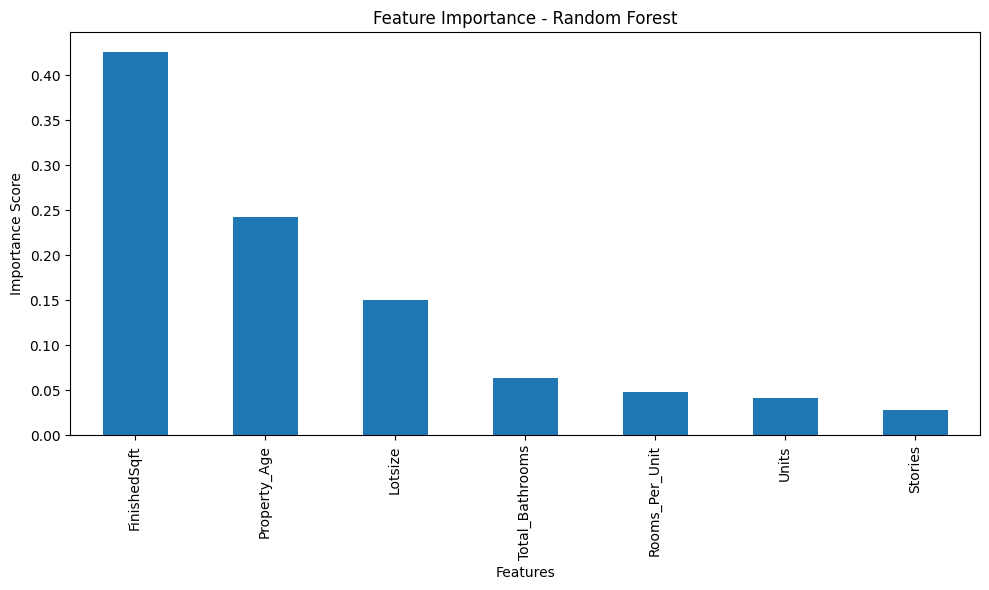

XGBoost Feature Importance:
FinishedSqft       0.372011
Lotsize            0.175006
Property_Age       0.135259
Total_Bathrooms    0.130447
Units              0.122555
Stories            0.046051
Rooms_Per_Unit     0.018671
dtype: float32


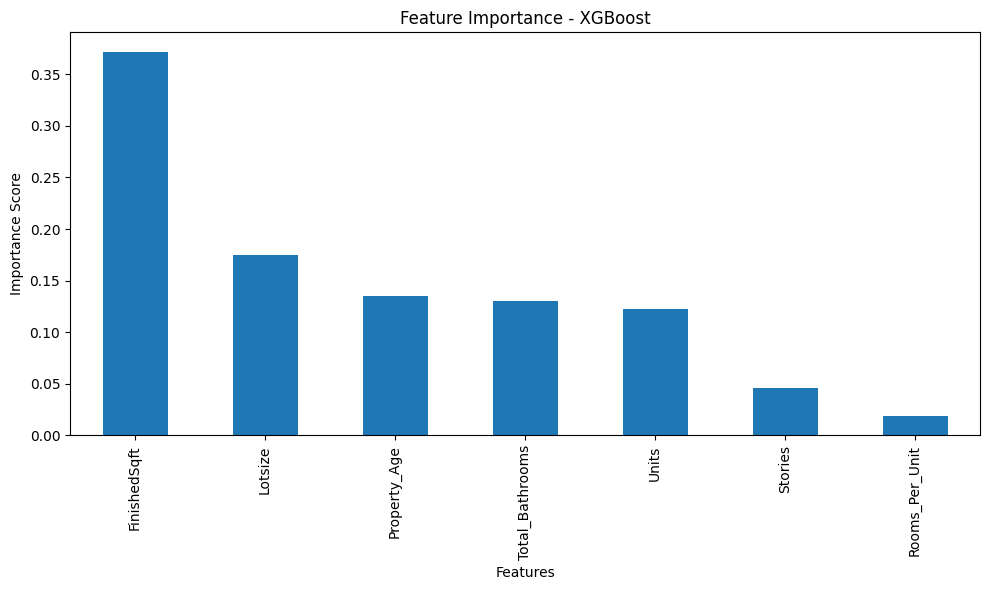

Gradient Boosting Feature Importance:
FinishedSqft       0.470927
Property_Age       0.208159
Lotsize            0.124199
Units              0.085523
Total_Bathrooms    0.068746
Stories            0.029258
Rooms_Per_Unit     0.013188
dtype: float64


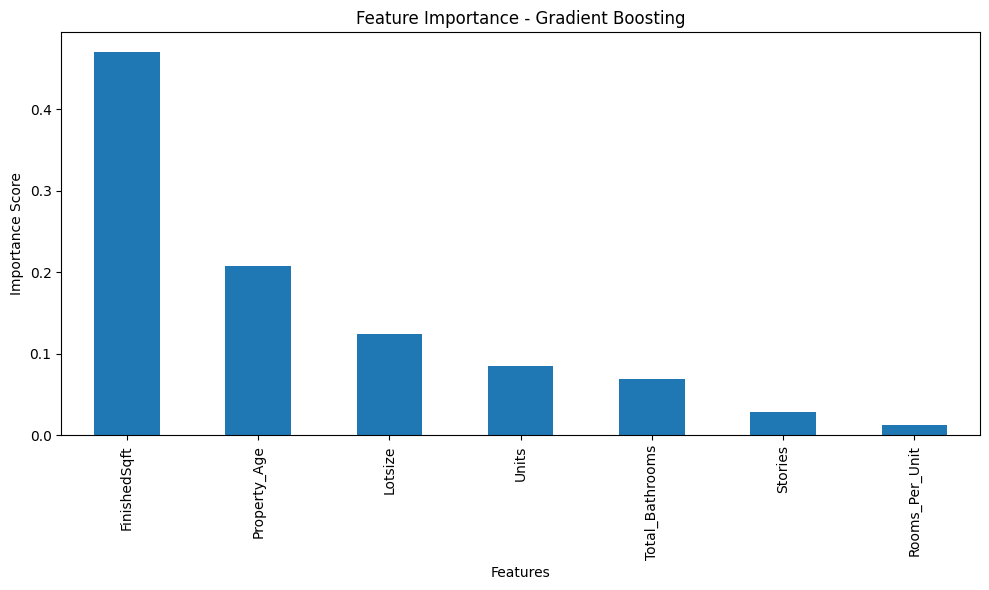

In [127]:
# Feature Importance scores from Tree Based Models
tree_models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Gradient Boosting": gb_model
}

for name, model in tree_models.items():
    if hasattr(model, "feature_importances_"):
        importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
        print(f"{name} Feature Importance:")
        print(importance)

        # Visualize
        plt.figure(figsize=(10, 6))
        importance.plot(kind="bar", title=f"Feature Importance - {name}")
        plt.xlabel("Features")
        plt.ylabel("Importance Score")
        plt.tight_layout()
        plt.show()

Linear Regression Coefficients:
FinishedSqft       0.194384
Total_Bathrooms    0.104186
Stories            0.050959
Units              0.029654
Lotsize            0.029314
Rooms_Per_Unit    -0.025945
Property_Age      -0.143721
dtype: float64


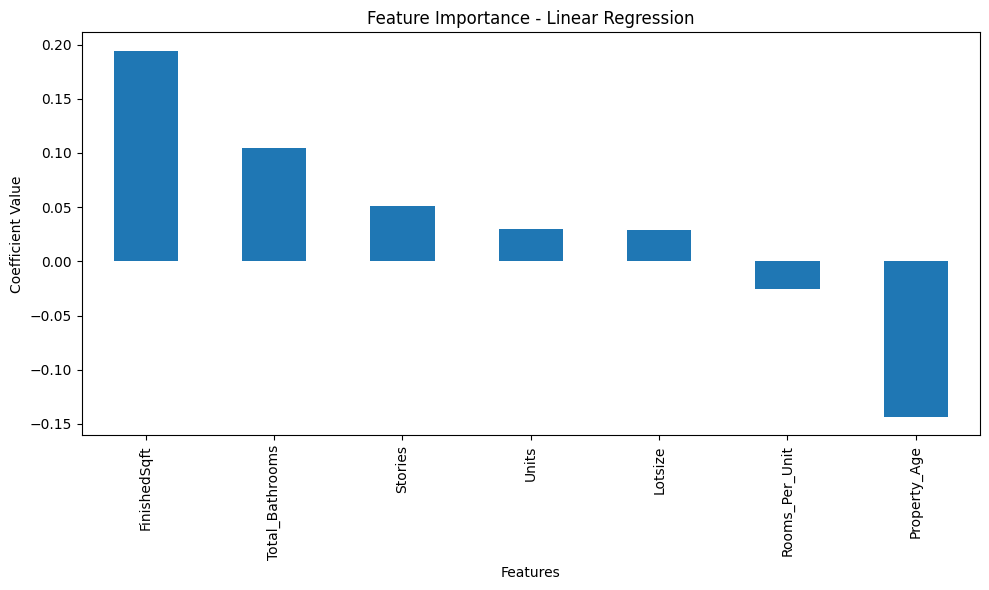

In [125]:
# Coefficients from Linear Regression
coef = pd.Series(lr_model.coef_, index=features).sort_values(ascending=False)
print("Linear Regression Coefficients:")
print(coef)

plt.figure(figsize=(10, 6))
coef.plot(kind="bar", title="Feature Importance - Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [142]:
# Hyperparameters Tuning
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs=-1)
rf_search.fit(X_train_scaled, y_train)

print("Tuned Random Forest Parameters:", rf_search.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [143]:
gbr_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 10]
}

gbr = GradientBoostingRegressor(random_state=42)
gbr_search = GridSearchCV(gbr, gbr_params, cv=3, scoring="r2", n_jobs=-1)
gbr_search.fit(X_train_scaled, y_train)

print("Tuned Gradient Boosting Parameters:", gbr_search.best_params_)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [144]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 10],
    "subsample": [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_search = GridSearchCV(xgb_model, xgb_params, cv=3, scoring="r2", n_jobs=-1)
xgb_search.fit(X_train_scaled, y_train)

print("Tuned XGBoost Parameters:", xgb_search.best_params_)

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [149]:
# Retrain after Parameter Tuning Random Forest
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
rf_model_optimized.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [150]:
# Retrain after Parameter Tuning Gradient Boostin
gb_model_optimized = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    random_state=42
)
gb_model_optimized.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [152]:
# Retrain after Parameter Tuning xgb Regressor
xgb_model_optimized = xgb.XGBRegressor(
    learning_rate=0.2,
    n_estimators=300,
    max_depth=3,
    subsample=1.0,
    random_state=42
)
xgb_model_optimized.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [165]:
# Train all optimized models before adding them to the dictionary
rf_model_optimized.fit(X_train_scaled, y_train)
gb_model_optimized.fit(X_train_scaled, y_train)
xgb_model_optimized.fit(X_train_scaled, y_train)

# Add the fitted models to the dictionary
optimized_models = {
    "Random Forest": rf_model_optimized,
    "Gradient Boosting": gb_model_optimized,
    "XGBoost": xgb_model_optimized
}

In [166]:
for name, model in optimized_models.items():
    y_pred = model.predict(X_test_scaled)

    # Transform back from log scale
    y_test_orig = np.expm1(y_test)
    y_pred_orig = np.expm1(y_pred)

    # Metrics
    r2 = r2_score(y_test_orig, y_pred_orig)
    rmse = mean_squared_error(y_test_orig, y_pred_orig, squared=False)
    mae = mean_absolute_error(y_test_orig, y_pred_orig)

    print(f"{name} Performance:")
    print(f"  R²: {r2:.4f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")

Random Forest Performance:
  R²: 0.5763
  RMSE: $356,366.02
  MAE: $70,509.77
Gradient Boosting Performance:
  R²: 0.3755
  RMSE: $432,668.26
  MAE: $70,285.76
XGBoost Performance:
  R²: 0.3755
  RMSE: $432,668.26
  MAE: $70,285.76


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


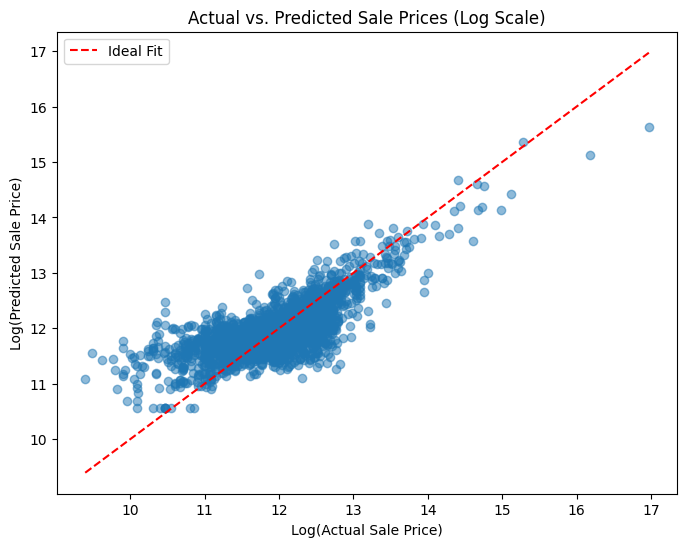

In [117]:
# Log-transform actual and predicted values
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(y_test_orig), np.log1p(y_pred_orig), alpha=0.5)
plt.plot([min(np.log1p(y_test_orig)), max(np.log1p(y_test_orig))],
         [min(np.log1p(y_test_orig)), max(np.log1p(y_test_orig))], 'r--', label="Ideal Fit")
plt.xlabel("Log(Actual Sale Price)")
plt.ylabel("Log(Predicted Sale Price)")
plt.title("Actual vs. Predicted Sale Prices (Log Scale)")
plt.legend()
plt.show()